<a href="https://colab.research.google.com/github/beatricebianchi3/FINTECH-ML---Driven-early-warning-system/blob/main/CrashBusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRASHBUSTERS**
## **AN EARLY WARNING SYSTEM FOR MARKET ANOMALY DETECTION**

Financial markets are prone to crashes, which can have severe consequences for investors and the economy.

In this project, we develop an Early Warning System using **machine learning** techniques to detect potential market crashes before they occur. \
We aim to provide traders and investors with timely **alerts** to mitigate risks and make informed decisions.

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# **Data Collection \& Preprocessing**

We collected 22 years (2000-2021) weekly historical market data from Bloomberg. The dataset is imported from the Excel file *FinancialMarketData.xlsx* and it contains features such as
* Key equity indices
* Bond indices
* Short/medium/long term interest rates
* Exchange rates
* Commodities
* Leading indicators (Economic surprise, Baltic Dry Index)
* VIX (option implied volatility).

Data are subsequently *cleaned* removing any NaN values and *standardized* in order to make all the features comparable.


In [261]:
# Dataset importation
df= pd.read_excel('FinancialMarketData.xlsx', sheet_name=2)

# Real labels (1 = Market crashes)
y = df.iloc[:, 0]

# Drop labels and dates
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

# Print dataset
df.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388,157.26,100.56,105.86,1.6460,25.77,22.50,6.671,...,116.4635,230.5267,123.7616,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405,165.01,101.86,105.47,1.6383,28.85,21.50,6.747,...,117.2674,231.3770,123.7616,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368,167.24,102.41,106.04,1.6496,28.28,23.02,6.634,...,117.9946,232.3895,123.7616,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311,166.85,104.92,107.85,1.6106,28.22,23.45,6.423,...,120.5100,231.9417,122.3281,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277,165.43,104.22,109.30,1.6108,28.02,21.25,6.231,...,118.7914,237.8117,122.3281,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [262]:
# Dataset cleaning
# Check for NaN values and remove them
nan_column = df.isna().sum()
print("Number of NaN in each column:")
print(nan_column)

df = df.dropna()
print("\nDataFrame senza righe contenenti NaN:")
print(df)

Number of NaN in each column:
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64

DataFrame senza righe contenenti NaN:
      XAU BGNL  ECSURPUS  BDIY       CRY      DXY     JPY     GBP    Cl1  \
0       283.25     0.077  1388  157.2600  100.560  105.86  1.6460  25.77   
1       287.65     0.043  1405  165.0100  101.860  105.47  1.6383  28.85   
2       287.15     0.135  1368  167.2400  102.410  106.04  1

In [263]:
# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
column_names = df.columns
column_names = column_names.tolist()

# Create standardized dataframe
df_standardized_pd = pd.DataFrame(df_standardized, columns=column_names)
df_standardized_pd

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,-1.424377,0.116941,-0.432277,-1.289246,0.846232,-0.058102,0.359879,-1.349527,0.290316,2.345104,...,-1.052593,-1.529484,-1.782485,-0.273397,0.956041,1.028789,-1.061289,-1.419419,-1.173857,-0.793990
1,-1.415478,0.019602,-0.423848,-1.175689,0.960528,-0.088487,0.323600,-1.230558,0.174552,2.409617,...,-1.045276,-1.526739,-1.782485,-0.255250,1.040230,1.045740,-0.991858,-1.385836,-1.149828,-0.857078
2,-1.416489,0.282989,-0.442193,-1.143014,1.008884,-0.044078,0.376841,-1.252575,0.350514,2.313697,...,-1.038657,-1.523471,-1.782485,-0.316639,0.894944,0.949983,-1.030691,-1.444539,-1.135224,-0.868402
3,-1.425389,0.443312,-0.470454,-1.148728,1.229563,0.096943,0.193090,-1.254892,0.400292,2.134589,...,-1.015762,-1.524916,-1.801371,-0.317527,1.025317,1.111444,-1.075649,-1.494479,-1.124171,-0.915718
4,-1.393734,0.789723,-0.487312,-1.169535,1.168019,0.209916,0.194033,-1.262618,0.145611,1.971609,...,-1.031405,-1.505970,-1.801371,-0.279370,1.288948,1.248754,-0.971646,-1.440592,-1.073498,-0.914505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.497764,0.867021,0.005523,-0.890078,0.123178,0.164727,-0.912241,-0.113874,0.035636,-1.342820,...,1.781110,1.759206,1.723279,3.142187,1.560758,2.073760,-0.234767,0.108805,2.473954,2.300980
1107,1.412004,0.763956,-0.077773,-0.884629,0.207669,0.287049,-0.931558,-0.006107,-0.044241,-1.306913,...,1.788943,1.736163,1.670111,3.192590,1.678141,2.107362,-0.271440,0.149513,2.461125,2.218884
1108,1.528751,1.156174,-0.083227,-0.870486,0.123090,0.255105,-0.883029,-0.053231,-0.216730,-1.345706,...,1.807212,1.761959,1.734240,3.363323,1.744049,2.049008,-0.216624,0.082013,2.457967,2.345061
1109,1.527558,1.233472,-0.059428,-0.836822,0.080624,0.201346,-0.923077,-0.020399,-0.386903,-1.370407,...,1.804880,1.769406,1.730325,3.466292,1.748859,2.061209,-0.225549,0.105527,2.415978,2.202708


# **Data splitting**

We split the dataset into train (60%), validation (20%) and test (20%) sets to ensure robust model evaluation and selection.

In [264]:
# Dataset splitting: 60-20-20
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_standardized_pd, y, test_size=0.2, random_state=41)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=41)

print("Number of instances in training set:", df_standardized_pd.shape[0])
print("Number of instances in training set:", X_train.shape[0])
print("Number of instances in validation set:", X_val.shape[0])
print("Number of instances in test set:", X_test.shape[0])

Number of instances in training set: 1111
Number of instances in training set: 666
Number of instances in validation set: 222
Number of instances in test set: 223


# **Feature Selection**

To effectively manage and analyze the dataset, we have split it into 4 distinct buckets exploiting *prior knowledge* :
- **Bonds**: This bucket includes data on various bonds, which are debt instruments issued by governments or corporations.
- **Equities**: This bucket consists of stock market data, representing shares of ownership in companies.
- **Commodities**: This bucket includes data on physical goods like gold and oil, which are traded on exchanges.
- **Indexes**: This bucket contains data on market indexes, which track the performance of a group of assets in a specific market.

Each of these buckets provides unique insights into different segments of the financial market, allowing us to analyze and detect anomalies across a diverse range of assets.



In [265]:
# Bucket train set splitting
bond_train = X_train.iloc[:, 9:35]
equity_train = X_train.iloc[:, 35:42]
commodities_train = X_train.iloc[:, [0,3,7]]
indexes_train = X_train.iloc[:, [1,2,4,5,6,8]]

# Print the columns' name in each bucket as check
print("Bonds: ", bond_train.columns.tolist())
print("Equity: ", equity_train.columns.tolist())
print("Commodities: ", commodities_train.columns.tolist())
print("Indexes: ", indexes_train.columns.tolist())

Bonds:  ['USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU']
Equity:  ['MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']
Commodities:  ['XAU BGNL', 'CRY', 'Cl1']
Indexes:  ['ECSURPUS', 'BDIY', 'DXY', 'JPY', 'GBP', 'VIX']


In [266]:
# Bucket validation set splitting
bond_val = X_val.iloc[:, 9:35]
equity_val = X_val.iloc[:, 35:42]
commodities_val = X_val.iloc[:, [0,3,7]]
indexes_val = X_val.iloc[:, [1,2,4,5,6,8]]

In [267]:
# Bucket test set splitting
bond_test = X_test.iloc[:, 9:35]
equity_test = X_test.iloc[:, 35:42]
commodities_test = X_test.iloc[:, [0,3,7]]
indexes_test = X_test.iloc[:, [1,2,4,5,6,8]]

# **Bucket Models**

6 Different machine learning models have been evaluated on each bucket:
* Naive Bayes
* Decision Tree
* Random Forest
* Logistic Regression
* k-Nearest Neighbors
* Support Vector Machine

The primary evaluation metrics were
* **Recall** of the positive outcomes (market anomalies): it measures the ability of the model to correctly identify true positives, which is crucial for an EWS to *avoid missing potential market crashes*;
* **Precision** of the positive outcomes (market anomalies): it measures the proportion of true positives among all positive predictions, ensuring that the alerts generated are reliable and not *false alarms*.

Based on our evaluation, Random Forest (RF) and k-Nearest Neighbors (kNN) emerged as the top-performing models across all four buckets. They consistently demonstrated higher Recall and Precision scores compared to the other models.

Here is a summary of why these two models were selected:
- **Random Forest (RF):**
  - RF is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting.
  - It handles large datasets with higher dimensionality well, which is beneficial given the diverse features in our market data.
  - RF demonstrated robust performance in detecting market anomalies, showing a good balance between Recall and Precision.

- **k-Nearest Neighbors (kNN):**
  - kNN is a simple, non-parametric algorithm that classifies instances based on the majority class among the k-nearest neighbors.
  - It is effective in scenarios where the decision boundary is non-linear, which is often the case in financial market data.
  - kNN showed high precision rates, indicating its predictions' reliability, reducing false alarms risk.

The intermediate steps and detailed evaluation results for each model are not shown here, but they can be seen on Github in the other notebooks of the project.

Below, we present the implementation and evaluation of the selected models. Specifically, we applied RF for bonds and indexes, and kNN for equities and commodities.


In [268]:
def randomForest_run(X_train, Y_train, X_val, Y_val):

  # Training
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, Y_train)

  # Model evaluation on validation
  Y_val_pred = model.predict(X_val)
  val_accuracy = accuracy_score(Y_val, Y_val_pred)
  print("Validation Accuracy:", val_accuracy)
  print("Classification Report (Validation Set):")
  print(classification_report(Y_val, Y_val_pred))

  # Get the predicted probabilities for the positive class (Y=1)
  Y_val_probs = model.predict_proba(X_val)[:, 1]

  # Compute ROC curve and AUC for validation set
  fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_probs)
  roc_auc_val = auc(fpr_val, tpr_val)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='ROC curve (Val) (AUC = %0.2f)' % roc_auc_val)
  plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  # Features' importance
  importances = model.feature_importances_
  feature_names=X_val.columns
  top_n=3
  indices = np.argsort(importances)[::-1]
  sorted_importances = importances[indices][:top_n]
  sorted_feature_names = np.array(feature_names)[indices][:top_n]

  # Plot features' importance
  plt.figure(figsize=(10, 6))
  plt.barh(np.arange(top_n), sorted_importances, align='center', color='skyblue')
  plt.yticks(np.arange(top_n), sorted_feature_names, fontsize=12)
  plt.xticks(fontsize=12)
  plt.xlabel('Feature Importance', fontsize=14)
  plt.ylabel('Features', fontsize=14)
  plt.title('Top {} Feature Importances'.format(top_n), fontsize=16)
  plt.gca().invert_yaxis()  # Inverti l'ordine delle feature per mostrare le più importanti in alto
  plt.show()
  return Y_val_pred, model

In [269]:
def kNN_run(X_train, Y_train, X_val, Y_val):

  kNN = KNeighborsClassifier()

  # Define a value set for the hyperparameter k
  param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8]}

  # GridSearch cross-validation for hyperparameter tuning
  grid_search = GridSearchCV(kNN, param_grid, cv=5)
  grid_search.fit(X_train, Y_train)

  print("Best hyperparameters:")
  print(grid_search.best_params_)

  # Training

  model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
  model.fit(X_train, Y_train)

  # Model evaluation

  # Evaluate on validation set
  Y_val_pred = model.predict(X_val)
  val_accuracy = accuracy_score(Y_val, Y_val_pred)
  print("Validation Accuracy:", val_accuracy)
  print("Classification Report (Validation Set):")
  print(classification_report(Y_val, Y_val_pred))

  # Get the predicted probabilities for the positive class (Y=1) from the model
  Y_val_probs = model.predict_proba(X_val)[:, 1]

  # Compute ROC curve and AUC for validation set
  fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_probs)
  roc_auc_val = auc(fpr_val, tpr_val)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_val, tpr_val, color='blue', lw=2, label='ROC curve (Val) (AUC = %0.2f)' % roc_auc_val)
  plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

  return Y_val_pred, model

Validation Accuracy: 0.9144144144144144
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       175
           1       0.91      0.66      0.77        47

    accuracy                           0.91       222
   macro avg       0.91      0.82      0.86       222
weighted avg       0.91      0.91      0.91       222



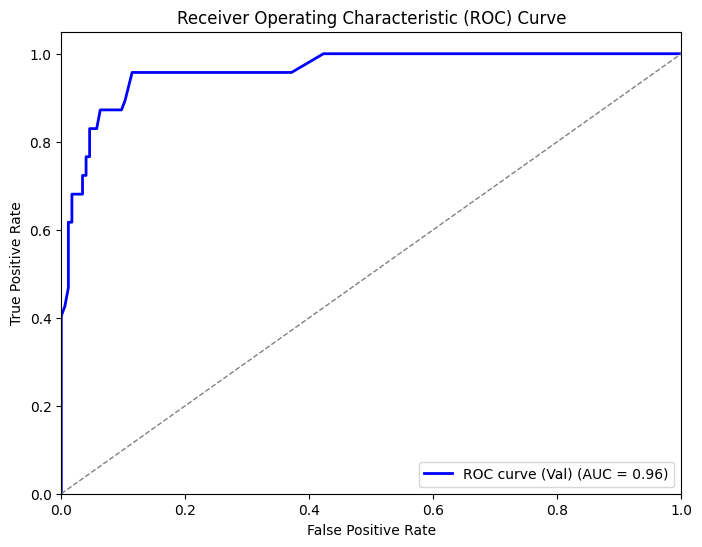

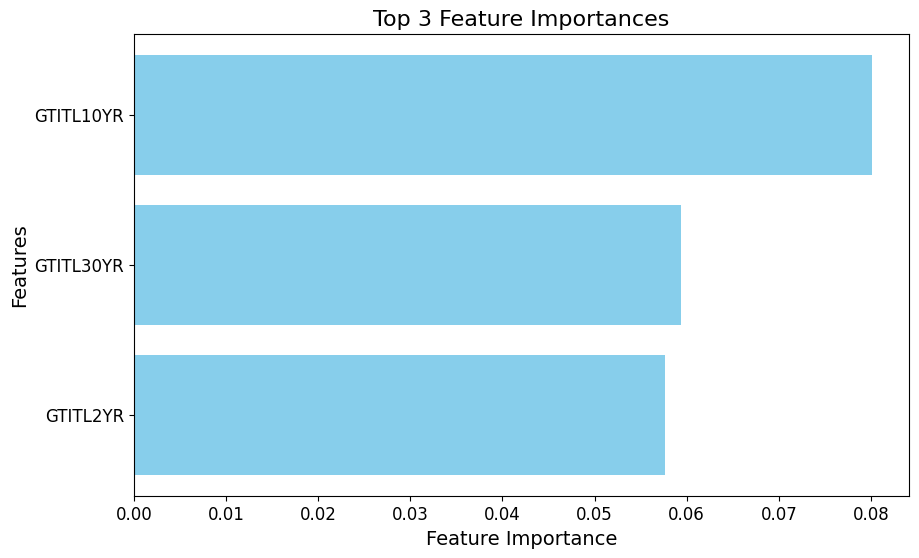

In [270]:
# BONDS : Random Forest training & validation

val_pred_bonds, rf_bonds = randomForest_run(bond_train, y_train, bond_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8783783783783784
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       175
           1       0.76      0.62      0.68        47

    accuracy                           0.88       222
   macro avg       0.83      0.78      0.80       222
weighted avg       0.87      0.88      0.87       222



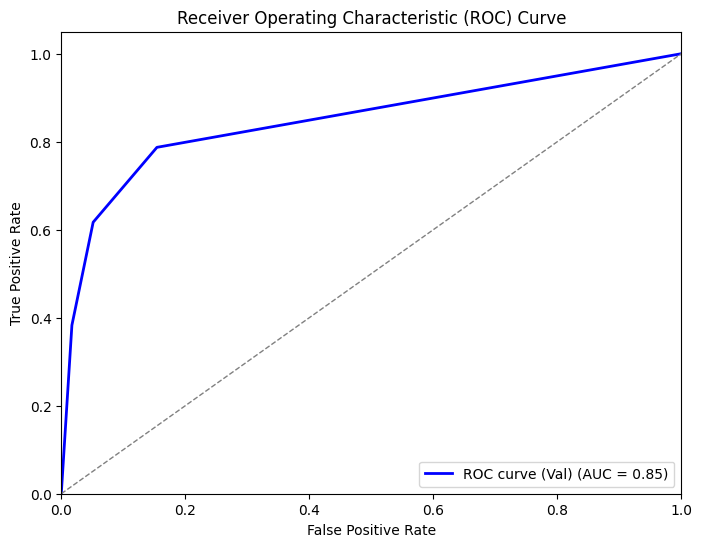

In [271]:
# EQUITY: kNN training & validation

val_pred_equity, kNN_equity = kNN_run(equity_train, y_train, equity_val, y_val)

Best hyperparameters:
{'n_neighbors': 3}
Validation Accuracy: 0.8918918918918919
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       175
           1       0.81      0.64      0.71        47

    accuracy                           0.89       222
   macro avg       0.86      0.80      0.82       222
weighted avg       0.89      0.89      0.89       222



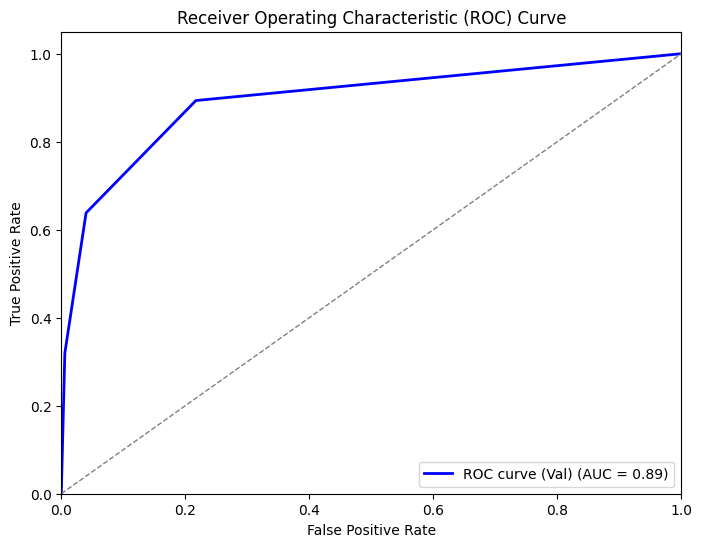

In [272]:
# COMMODITIES: kNN training & validation

val_pred_commodities, kNN_commodities = kNN_run(commodities_train, y_train, commodities_val, y_val)

Validation Accuracy: 0.9144144144144144
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       175
           1       0.94      0.64      0.76        47

    accuracy                           0.91       222
   macro avg       0.92      0.81      0.85       222
weighted avg       0.92      0.91      0.91       222



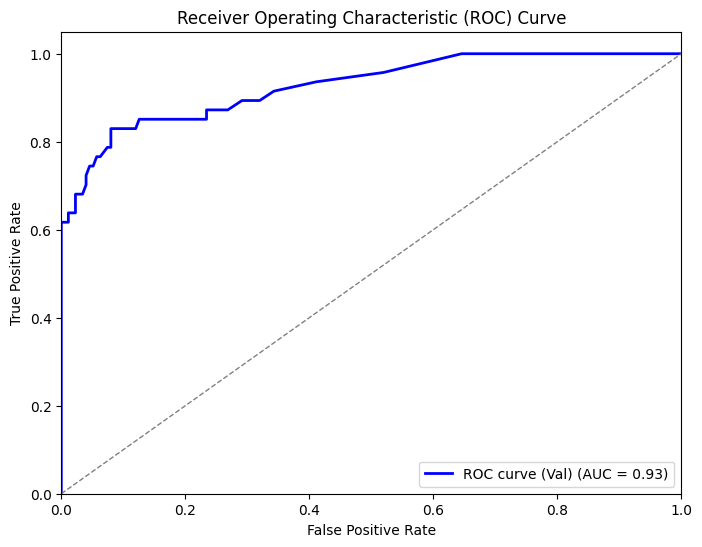

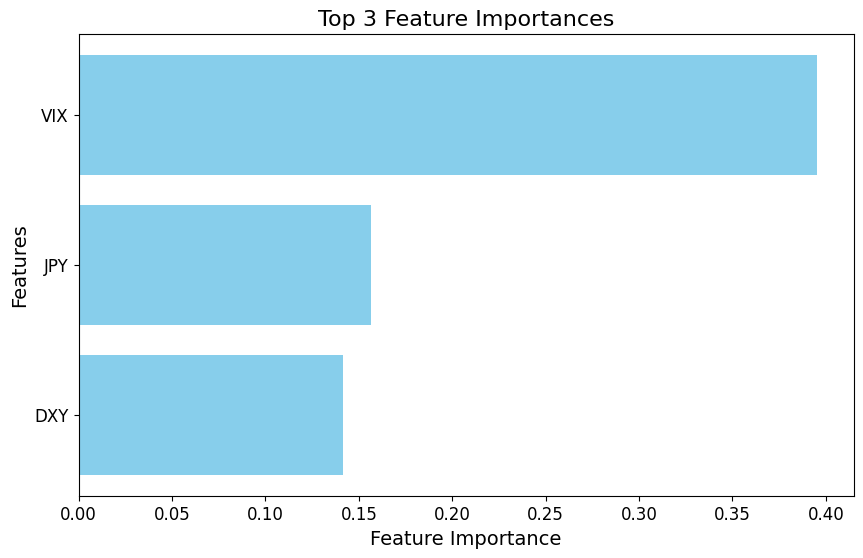

In [273]:
# INDEXES: Random Forest training & validation

val_pred_indexes, rf_indexes = randomForest_run(indexes_train, y_train, indexes_val, y_val)

# **Stacking: Ensemble model**
To further enhance the predictive performance of our Early Warning System, we employed an **ensemble technique** called Stacking.

Stacking involves training multiple *base learners* and then using their predictions as input features for a **meta-learner**, which makes the final prediction. This approach leverages the strengths of different models to improve overall accuracy and robustness.

As the meta-learner, we compared several models and we finally selected **Logistic Regression** due to its *simplicity*, *interpretability* and *effectiveness* in binary classification tasks.

This approach allows us to combine the predictive power of RF and kNN, with Logistic Regression providing the final decision boundary.



In [281]:
# Step 1: Define the meta-learner - Logistic Regression
meta_learner = LogisticRegression(fit_intercept=False)

# Step 2: Concatenate the buckets' validation predictions
X_val_meta = np.column_stack((val_pred_bonds, val_pred_equity, val_pred_commodities, val_pred_indexes))

# Step 3a: Train meta-learner on all predictions
meta_learner.fit(X_val_meta, y_val)

# Step 3b: Get the coefficients of the model
coefficients = meta_learner.coef_
#intercept = model.intercept_          # (intecept = 0)

#print("Intercept beta0:", intercept)
print("Model coefficients:\n")
print("β1 bond:       {:>15.8f}".format(coefficients[0][0]))
print("β2 equity:     {:>15.8f}".format(coefficients[0][1]))
print("β3 commodities:{:>15.8f}".format(coefficients[0][2]))
print("β4 indexes:    {:>15.8f}".format(coefficients[0][3]))

# Step 4: Get the buckets' test predictions
test_pred_bonds = rf_bonds.predict(bond_test)
test_pred_equity = kNN_equity.predict(equity_test)
test_pred_commodities = kNN_commodities.predict(commodities_test)
test_pred_indexes = rf_indexes.predict(indexes_test)

X_test_meta = np.column_stack((test_pred_bonds, test_pred_equity, test_pred_commodities, test_pred_indexes))

# Step 5: Make prediction with the meta-learner using the individual models as features
stacking_predictions = meta_learner.predict(X_test_meta)

# Final predicted probability for Y=1
predicted_proba = meta_learner.predict_proba(X_test_meta)
predicted_proba = (predicted_proba >= 0.6).astype(int)
crashes_prob = predicted_proba[:, 1]

# Model performance report
test_accuracy = accuracy_score(y_test, stacking_predictions)
print("\nValidation Accuracy:", test_accuracy)
print("\nClassification report:\n")
print(classification_report(y_test,stacking_predictions))

Model coefficients:

β1 bond:            1.24395438
β2 equity:         -0.38871885
β3 commodities:     0.09328351
β4 indexes:         1.42336437

Validation Accuracy: 0.8699551569506726

Classification report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       175
           1       0.71      0.67      0.69        48

    accuracy                           0.87       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.87      0.87      0.87       223



# **Results Visualization**
Visualization plays a crucial role in understanding and interpreting the results of machine learning models, especially in complex domains like financial market crash detection. \
Here are several key reasons why visualization is significant in this context:
* **Enhanced interpretability**: Visualization provides a clear and intuitive representation of the data and the model's predictions;
* **Patterns identification**: It allows for the identification of underlying patterns and trends that might not be evident from raw data or numerical summaries alone;
* **Model Performance Evaluation**: It aids in the evaluation of the model's performance by comparing the predicted crash points with the actual crash points;
* **Communication of results**: Effective visualization is an excellent communication tool, especially for stakeholders who may not have a deep technical background;
* **Building confidence and trust**: Transparent visual representation of model predictions and their alignment with real-world events builds confidence and trust among users.

Specifically, in the next code lines, you will see the *confusion matrix* of the ensemble model, the *ROC curve* and the scatter plot of *actual VS predicted crashes* represented over the time series of the most influent index of each bucket.

### **Confusion matrix**


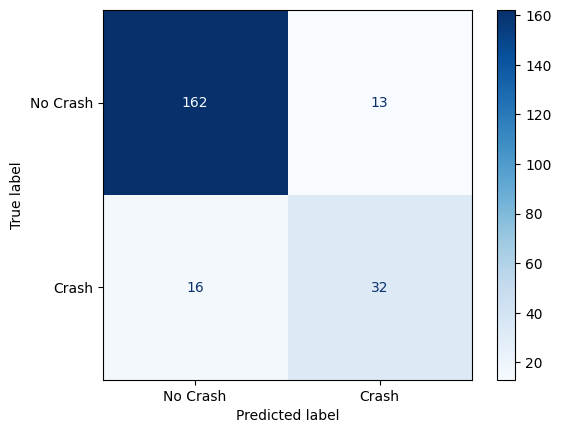

In [282]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, stacking_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Crash', 'Crash'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

With 32 out of 48 anomalies detected, the model shows **effectiveness** in identifying market anomalies.\
However, there is still *room for improvement*, considering the likelihood of false alarms and missed crashes, although the latter are already quite limited.

### **ROC Curve**

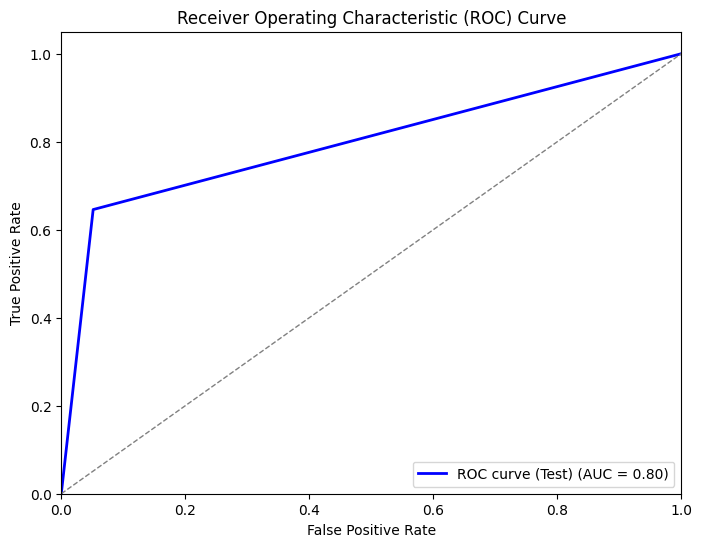

In [283]:
# Compute ROC curve and AUC for testing set
fpr_meta, tpr_meta, _ = roc_curve(y_test, crashes_prob)
roc_auc_meta = auc(fpr_meta, tpr_meta)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_meta, tpr_meta, color='blue', lw=2, label='ROC curve (Test) (AUC = %0.2f)' % roc_auc_meta)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Actual VS Predicted Crashes**

In the plot below, you find the most direct visualization of the model results: actual crashes (red dots) and the predicted ones (black stars) are marked simultaneously on the time series of the representative indices of each bucket.\
The **accuracy** of the model is quite evident, considering the proportion of overlapping dots and stars.


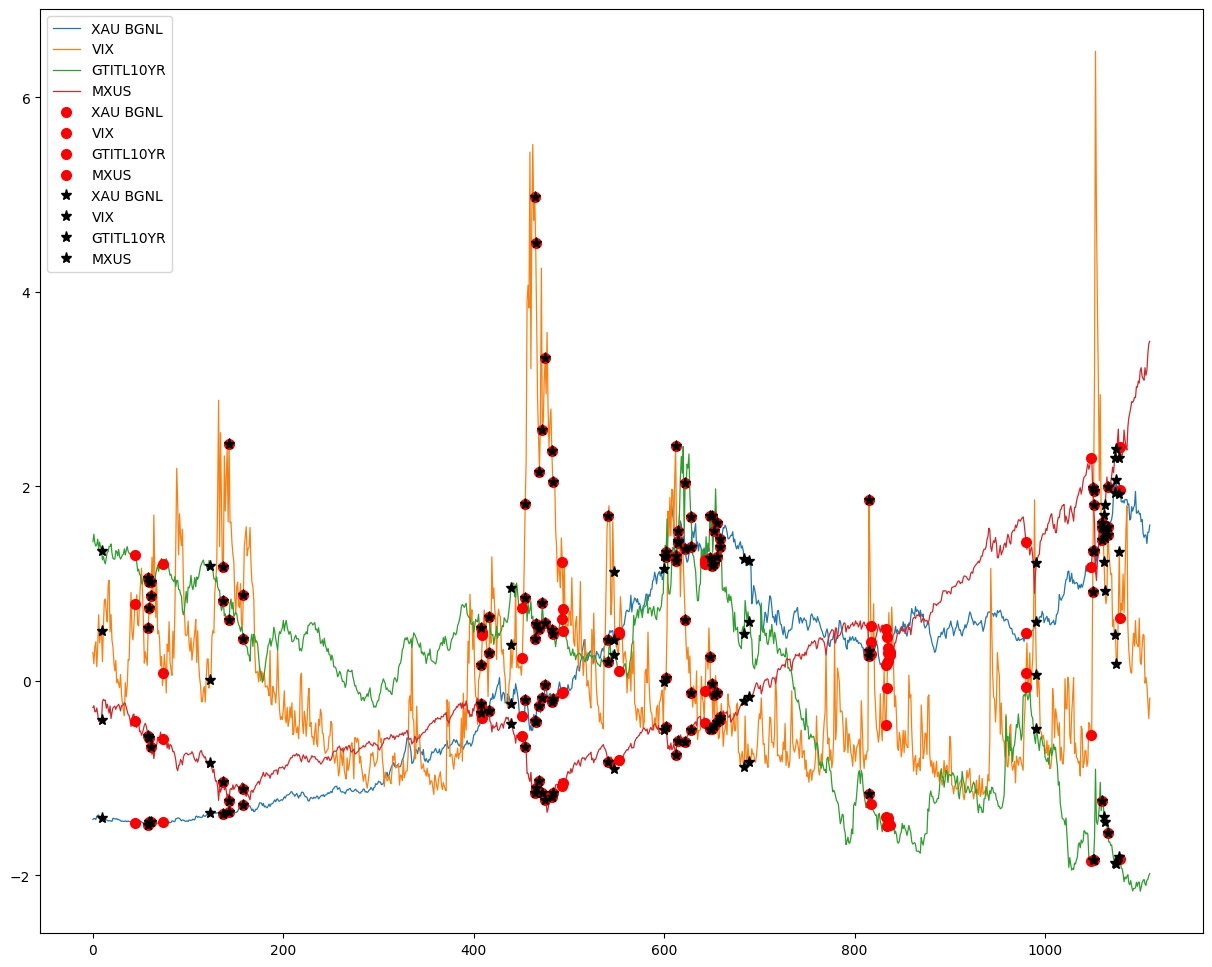

In [277]:
# Sort the actual and predicted labels in chronological order
stacking_predictions = pd.Series(stacking_predictions, index=y_test.index).sort_index()
y_test_sorted = y_test.sort_index()

# Identify actual crashes and the predicted ones for comparison
real_crash = [i for i in y_test_sorted.index if y_test_sorted[i] == 1]
pred_crash = [i for i in stacking_predictions.index if stacking_predictions[i] == 1]

# Visualize the predictions over the most significant indices of each bucket according to the model
fig, ax = plt.subplots(figsize=(15,12))
df_standardized_pd.iloc[:, [0,8,19,35]].plot(ax=ax, linewidth=0.9)
df_standardized_pd.iloc[real_crash, [0,8,19,35]].plot(style='o', markersize=7, color='red', ax=ax)
df_standardized_pd.iloc[pred_crash, [0,8,19,35]].plot(style='*', markersize=8, color='black', ax=ax)
plt.show()

# **Oversampling**

As said before, there's still room for improvement. As further analysis, we suggest here the oversampling solution in order to deal with the *imbalanced dataset*.\
By oversampling the training sets of the different buckets, we allow our model to better capture the characteristics of the relative market crashes, thus improving the overall performance.\
Indeed, the recall has increased to 0.73.

In [278]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [279]:
# Oversampled bond
bond_resampled, y_resampled = oversampler.fit_resample(bond_train, y_train)
# Oversampled equity
equity_resampled, y_resampled = oversampler.fit_resample(equity_train, y_train)
# Oversampled commodities
commodities_resampled, y_resampled = oversampler.fit_resample(commodities_train, y_train)
# Oversampled indexes
indexes_resampled, y_resampled = oversampler.fit_resample(indexes_train, y_train)

In [280]:
# Step 2: Train base models
rf_bonds_resample = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bonds_resample.fit(bond_resampled, y_resampled)
val_pred_bonds_resample = rf_bonds_resample.predict(bond_val)

kNN_equity_resample = KNeighborsClassifier(n_neighbors=3)
kNN_equity_resample.fit(equity_resampled, y_resampled)
val_pred_equity_resample = kNN_equity_resample.predict(equity_val)

kNN_commodities_resample = KNeighborsClassifier(n_neighbors=3)
kNN_commodities_resample.fit(commodities_resampled, y_resampled)
val_pred_commodities_resample = kNN_commodities_resample.predict(commodities_val)

rf_ind_resample = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ind_resample.fit(indexes_resampled, y_resampled)
val_pred_ind_resample = rf_ind_resample.predict(indexes_val)

X_val_meta_resample = np.column_stack((val_pred_bonds_resample, val_pred_equity_resample, val_pred_commodities_resample, val_pred_ind_resample))

# Step 3: Train meta-model (using predictions from base models as features)
meta_learner_resample = LogisticRegression(fit_intercept=False)
meta_learner_resample.fit(X_val_meta_resample, y_val)

# get the coefficients of the model
coefficients = meta_learner_resample.coef_
#intercept = model.intercept_

#print("Intercept beta0:", intercept)
print("Model coefficients:\n")
print("β1 bond:       {:>15.8f}".format(coefficients[0][0]))
print("β2 equity:     {:>15.8f}".format(coefficients[0][1]))
print("β3 commodities:{:>15.8f}".format(coefficients[0][2]))
print("β4 indexes:    {:>15.8f}".format(coefficients[0][3]))

# Step 4: Make predictions on test set
test_pred_bonds_resample = rf_bonds_resample.predict(bond_test)
test_pred_equity_resample = kNN_equity_resample.predict(equity_test)
test_pred_commodities_resample = kNN_commodities_resample.predict(commodities_test)
test_pred_indexes_resample = rf_ind_resample.predict(indexes_test)

X_test_meta_resample = np.column_stack((test_pred_bonds_resample, test_pred_equity_resample, test_pred_commodities_resample, test_pred_indexes_resample))

# Step 5: Make prediction with the meta-learner using the individual models as features
stacking_pred_resample = meta_learner_resample.predict(X_test_meta_resample)

# Use the predictions from base models as features to make predictions with the meta-model
oversampl_accuracy = accuracy_score(y_test, stacking_pred_resample)
print("\nValidation Accuracy:", oversampl_accuracy)
print("\nClassification report:\n")
print(classification_report(y_test,stacking_pred_resample))

Model coefficients:

β1 bond:            1.62690171
β2 equity:         -0.48376469
β3 commodities:    -0.43759456
β4 indexes:         0.96855788

Validation Accuracy: 0.874439461883408

Classification report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       175
           1       0.70      0.73      0.71        48

    accuracy                           0.87       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.88      0.87      0.88       223

